In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

## Can we tell if a Single or Multiple vehicles are involved ?
## From a couple of attributes, e.g. Bus involvement / Speed Limit / Day of Week etc.

In [5]:
# Load in csv
url = 'https://data.gov.au/data/dataset/5b530fb8-526e-4fbf-b0f6-aa24e84e4277/resource/d54f7465-74b8-4fff-8653-37e724d0ebbb/download/ardd_fatalcrashes_jan2021.csv'
ardd_df = pd.read_csv(url,low_memory=False,na_values =['-9','Unspecified'])
ardd_df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
0,20213010.0,Qld,1,2021,Tuesday,17:00:00,Multiple,3,No,No,No,70,Major Cities of Australia,Brisbane - East,Redland (C),Sub-arterial Road,No,No,Weekday,Day
1,20211018.0,NSW,1,2021,Friday,04:55:00,Multiple,1,No,No,No,50,Major Cities of Australia,Sydney - South West,Fairfield,Collector Road,No,No,Weekday,Night
2,20215009.0,WA,1,2021,Saturday,05:55:00,Single,1,No,No,No,80,NaN,NaN,NaN,NaN,No,No,Weekend,Night
3,20213016.0,Qld,1,2021,Friday,17:00:00,Single,1,No,No,No,70,Outer Regional Australia,Cairns,Cairns (R),Local Road,No,No,Weekday,Day
4,20215018.0,WA,1,2021,Sunday,19:31:00,Single,1,No,No,No,50,NaN,NaN,NaN,NaN,No,No,Weekend,Night


In [3]:
# Drop column  'Crash ID', 'Time', 'National Remoteness Areas', '
# SA4 Name 2016', 'National LGA Name 2017','National Road Type','State' & 'Year'
# to reduce complexity
ardd_cleaned_df = ardd_df.drop(['Crash ID','Time','National Remoteness Areas', \
                                'SA4 Name 2016', 'National LGA Name 2017','National Road Type','State','Year'],axis=1)
ardd_cleaned_df.head()

,Month,Dayweek,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day
0,1,Tuesday,Multiple,3,No,No,No,70,No,No,Weekday,Day
1,1,Friday,Multiple,1,No,No,No,50,No,No,Weekday,Night
2,1,Saturday,Single,1,No,No,No,80,No,No,Weekend,Night
3,1,Friday,Single,1,No,No,No,70,No,No,Weekday,Day
4,1,Sunday,Single,1,No,No,No,50,No,No,Weekend,Night


In [4]:
# Drop rows with NaN
ardd_cleaned_df = ardd_cleaned_df.dropna(inplace=False)
print(f'Number of observations: {len(ardd_cleaned_df)}')

Number of observations: 28240


---------------------------------------------------------

# Starts with some graphs

In [7]:
graph_df = ardd_df

In [8]:
graph_df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
0,20213010.0,Qld,1,2021,Tuesday,17:00:00,Multiple,3,No,No,No,70,Major Cities of Australia,Brisbane - East,Redland (C),Sub-arterial Road,No,No,Weekday,Day
1,20211018.0,NSW,1,2021,Friday,04:55:00,Multiple,1,No,No,No,50,Major Cities of Australia,Sydney - South West,Fairfield,Collector Road,No,No,Weekday,Night
2,20215009.0,WA,1,2021,Saturday,05:55:00,Single,1,No,No,No,80,NaN,NaN,NaN,NaN,No,No,Weekend,Night
3,20213016.0,Qld,1,2021,Friday,17:00:00,Single,1,No,No,No,70,Outer Regional Australia,Cairns,Cairns (R),Local Road,No,No,Weekday,Day
4,20215018.0,WA,1,2021,Sunday,19:31:00,Single,1,No,No,No,50,NaN,NaN,NaN,NaN,No,No,Weekend,Night


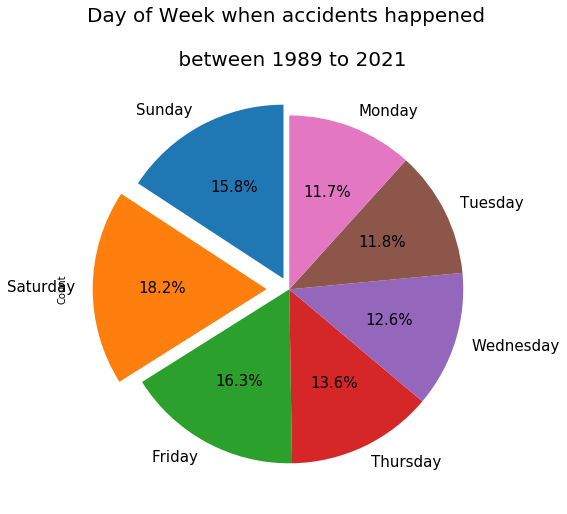

In [7]:
# Generate a pie plot showing the distribution of age group versus crashes using pandas
day_df = graph_df[["Dayweek"]]
groupby_dayweek = day_df.groupby(["Dayweek"])

# calculate count
count = groupby_dayweek["Dayweek"].count()

# create a dataframe to hold Age Group and Count
groupby_dayweek_df = pd.DataFrame({"Count": count
                           })

groupby_dayweek_df = groupby_dayweek_df.reindex(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday','Tuesday','Monday'])

# set the explode value
explode=[0.07,0.13,0.0,0.0,0.0,0.0,0.0]
plot = groupby_dayweek_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=90, autopct="%1.1f%%",fontsize=15,legend=None)
plt.title(f"Day of Week when accidents happened \n\n between 1989 to 2021",fontsize=20)
# plt.legend(bbox_to_anchor=(1.6,0.5), fontsize=20,loc="center right")
plt.show()

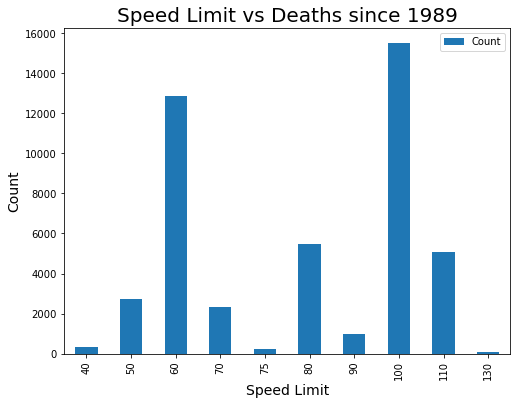

In [8]:
# Capture Speed Limit and Crash ID into new dataframe
spdlmt_df = graph_df[["Speed Limit"]]

# Remove "unknown", "unspecified" and "<40"
spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] != "<40")]
spdlmt_df = spdlmt_df.dropna(inplace=False)

# uniform the data type to INT as some of it is in STR
spdlmt_df["Speed Limit"] = spdlmt_df["Speed Limit"].astype(int)

# Limit results with Speed Limit >= 40
spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] >= 40)]

# group by the Speed Limit and count the number of fatality
groupby_spdlmt = spdlmt_df.groupby(["Speed Limit"])

# calculate count
count = groupby_spdlmt["Speed Limit"].count()

# create a dataframe to hold speed limit and Count
groupby_spdlmt_df = pd.DataFrame({"Count": count})

# create a bar chart of the data
groupby_spdlmt_df.plot(kind="bar", figsize=(8,6))

# Set a Title and labels
plt.title(f"Speed Limit vs Deaths since 1989", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.show()

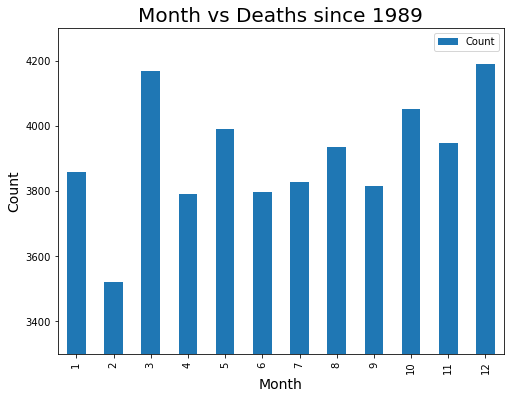

In [16]:
# Capture Speed Limit and Crash ID into new dataframe
month_df = graph_df[["Month"]]

# Remove "unknown", "unspecified" and "<40"
month_df = month_df.dropna(inplace=False)

# # uniform the data type to INT as some of it is in STR
# month_df["Speed Limit"] = month_df["Speed Limit"].astype(int)

# # Limit results with Speed Limit >= 40
# spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] >= 40)]

# group by the Speed Limit and count the number of fatality
groupby_month = month_df.groupby(["Month"])

# calculate count
count = groupby_month["Month"].count()

# create a dataframe to hold speed limit and Count
groupby_month_df = pd.DataFrame({"Count": count})

# create a bar chart of the data
groupby_month_df.plot(kind="bar", figsize=(8,6))

# Set a Title and labels
plt.title(f"Month vs Deaths since 1989", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.ylim(3300,4300)
plt.xlabel("Month",fontsize=14)
plt.show()

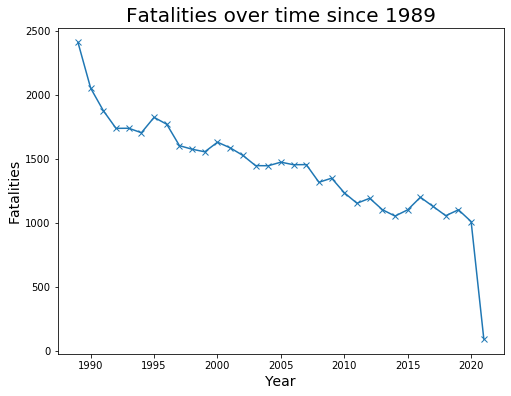

In [9]:
# capture Year and state into new dataframe
state_year_df = graph_df[["Year"]]

# group by the Year and count the number of fatality
groupby_state = state_year_df.groupby(["Year"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold Year and Count
groupby_year_df = pd.DataFrame({"Count": count})
plt.figure(figsize=(8,6))
plt.plot(groupby_year_df, marker = "x")
plt.title(f"Fatalities over time since 1989", fontsize=20)
plt.ylabel("Fatalities",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.show()

---------------------------------------------------------

In [10]:
# Convert Dayweek into get_dummies and append to the end of the Dataframe
ardd_cleaned_df = pd.concat([ardd_cleaned_df, pd.get_dummies(ardd_cleaned_df['Dayweek'])], axis=1); ardd_cleaned_df
ardd_cleaned_df = ardd_cleaned_df.drop(['Dayweek'],axis=1)
ardd_cleaned_df.head()

,Month,Crash Type,Number Fatalities,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,Multiple,3,No,No,No,70,No,No,Weekday,Day,0,0,0,0,0,1,0
1,1,Multiple,1,No,No,No,50,No,No,Weekday,Night,1,0,0,0,0,0,0
2,1,Single,1,No,No,No,80,No,No,Weekend,Night,0,0,1,0,0,0,0
3,1,Single,1,No,No,No,70,No,No,Weekday,Day,1,0,0,0,0,0,0
4,1,Single,1,No,No,No,50,No,No,Weekend,Night,0,0,0,1,0,0,0


In [11]:
# Convert No = 0, Yes = 1
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="No", value = 0) 
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Yes", value = 1)

# Convert Weekday = 0, Weekend = 1
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Weekday", value = 0) 
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Weekend", value = 1) 

# Convert Day = 0, Night = 1
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Day", value = 0) 
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Night", value = 1) 

# Convert Single = 0, Multiple = 1
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Single", value = 0) 
ardd_cleaned_df=ardd_cleaned_df.replace(to_replace ="Multiple", value = 1) 

# Remove 'Number Fatalities' as this would affect the prediction of 'Crash Type'
ardd_cleaned_df = ardd_cleaned_df.drop(['Number Fatalities'],axis=1)

# Rename column
ardd_cleaned_df = ardd_cleaned_df.rename(columns={
    "Crash Type": "Crash_Type",
    "Bus Involvement":"Bus_Involvement",
    "Heavy Rigid Truck Involvement":"Heavy_Rigid_Truck_Involvement",
    "Articulated Truck Involvement":"Articulated_Truck_Involvement",
    "Speed Limit":"Speed_Limit",
    "Christmas Period":"Christmas_Period",
    "Easter Period":"Easter_Period",
    "Day of week":"Day_of_week",
    "Time of day":"Time_of_day"})

In [12]:
ardd_cleaned_df.head()

,Month,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit,Christmas_Period,Easter_Period,Day_of_week,Time_of_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,1,0,0,0,70,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,50,0,0,0,1,1,0,0,0,0,0,0
2,1,0,0,0,0,80,0,0,1,1,0,0,1,0,0,0,0
3,1,0,0,0,0,70,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,50,0,0,1,1,0,0,0,1,0,0,0


In [13]:
# Drop rows with '<' sign (i.e. <40)
ardd_no_df = ardd_cleaned_df.drop(ardd_cleaned_df[ardd_cleaned_df.Speed_Limit.str.contains('<', na=False)].index)
print(f'Number of observations: {len(ardd_no_df)}')

Number of observations: 28235


In [14]:
len(ardd_no_df)

28235

In [15]:
# Dataframe for testing as Y (the column to predict)
ardd_one_df = ardd_no_df.filter(['Crash_Type'], axis=1)
ardd_one_df.head()

,Crash_Type
0,1
1,1
2,0
3,0
4,0


In [16]:
ardd_except_df = ardd_no_df.loc[:, ardd_no_df.columns != 'Crash_Type']
ardd_except_df.head()

,Month,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit,Christmas_Period,Easter_Period,Day_of_week,Time_of_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,70,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,50,0,0,0,1,1,0,0,0,0,0,0
2,1,0,0,0,80,0,0,1,1,0,0,1,0,0,0,0
3,1,0,0,0,70,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,50,0,0,1,1,0,0,0,1,0,0,0


In [17]:
# Split into Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(ardd_except_df, ardd_one_df, test_size=0.2)

In [18]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the X training data:', len(X_train))
print('Number of observations in the X test data:',len(X_test))
print('Number of observations in the Y training data:', len(y_train))
print('Number of observations in the Y test data:',len(y_test))

Number of observations in the X training data: 22588
Number of observations in the X test data: 5647
Number of observations in the Y training data: 22588
Number of observations in the Y test data: 5647


# Match it with Support Vector Machine

In [ ]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train.values.ravel())
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
# Print the confusion matrix
# confusion_matrix(y_test, predictions)
pd.DataFrame(confusion_matrix(y_test, predictions)).transpose()

,0,1
0,2978,1767
1,204,698


In [22]:
# y_train.Crash_Type.value_counts()
print('Training Data for Crash Type')
pd.DataFrame(y_train.Crash_Type.value_counts()).transpose()

Training Data for Crash Type


,0,1
Crash_Type,12838,9750


In [23]:
# y_test.Crash_Type.value_counts()
print('Test Data for Crash Type')
pd.DataFrame(y_test.Crash_Type.value_counts()).transpose()

Test Data for Crash Type


,0,1
Crash_Type,3182,2465


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, predictions)

0.6509651142199397

In [26]:
# Calculate the Classification Report
pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.627608,0.935889,0.751356,3182.000000
1,0.773836,0.283164,0.414612,2465.000000
accuracy,0.650965,0.650965,0.650965,0.650965
macro avg,0.700722,0.609527,0.582984,5647.000000
weighted avg,0.691439,0.650965,0.604362,5647.000000


Precision and Recall focus on the True Positive cases from different point of view.

Precision = True Positive / ( True Positive + False Positive )

Recall = True Positive / ( True Positive + False negative ) 

-------------------------------

# Match it with a Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train.values.ravel())
predictions = model_rf.predict(X_test)

In [29]:
# pd.DataFrame({'Importances': model_rf.feature_importances_}, index=ardd_except_df.columns).sort_values(by='Importances', ascending=False)

In [30]:
pd.DataFrame(confusion_matrix(y_test, predictions)).transpose()

,0,1
0,2372,1327
1,810,1138


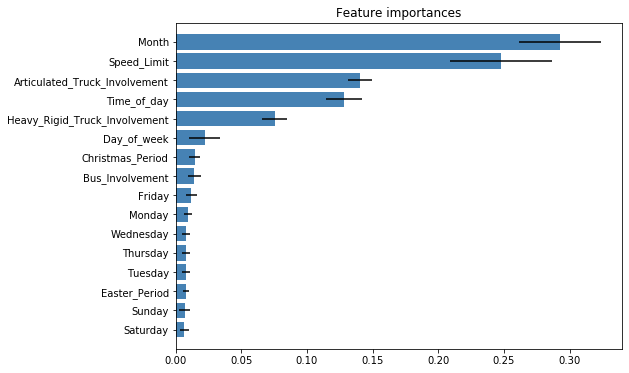

In [31]:
# Get the array of importances
importances = model_rf.feature_importances_

# Get the corresponding indices for listing in the graph
indices = np.argsort(importances)

std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)

plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.barh(range(ardd_except_df.shape[1]), importances[indices],
       color="steelblue", xerr=std[indices], align="center")
plt.yticks(range(ardd_except_df.shape[1]), ardd_except_df.columns[indices])
plt.ylim([-1, ardd_except_df.shape[1]])
plt.show()

In [32]:
pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.641254,0.745443,0.689435,3182.000000
1,0.584189,0.461663,0.515749,2465.000000
accuracy,0.621569,0.621569,0.621569,0.621569
macro avg,0.612722,0.603553,0.602592,5647.000000
weighted avg,0.616344,0.621569,0.613618,5647.000000
